## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [2]:
hm=pd.read_csv("hmeq.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

In [4]:
# Display first five rows
# Remove ___________ and complete the code

data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
# Display last 5 rows
# Remove ___________ and complete the code
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [6]:
# Check the shape of the data
# Remove ___________ and complete the code

data.shape

(5960, 13)

**Insights 5,960 rows and 13 columns**

In [7]:
# Check info of the data
# Remove ___________ and complete the code
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights This dataset contains 9 float values, 2 integers, and 2 objects. Can also see there are some null values here.**

In [8]:
# Analyse missing values - Hint: use isnull() function
# Remove ___________ and complete the code
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [9]:
# Check the percentage of missing values in the each column.
# Hint: divide the result from the previous code by the number of rows in the dataset
# Remove ___________ and complete the code

data.isnull().sum()/5960

BAD        0.000000
LOAN       0.000000
MORTDUE    0.086913
VALUE      0.018792
REASON     0.042282
JOB        0.046812
YOJ        0.086409
DEROG      0.118792
DELINQ     0.097315
CLAGE      0.051678
NINQ       0.085570
CLNO       0.037248
DEBTINC    0.212584
dtype: float64

**Insights The missing values are all at a manageable enough percentage in order to do feature engineering to impute values. If the percentage was above 50% then that data point would most likely be dropped. There are various different opinions on those online some saying 30% or above, other saying 60% and above. **

**figure out issues associated with filling or acoiding this data

In [10]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [11]:
cols

['REASON', 'JOB', 'BAD']

In [12]:
# Changing the data type of object type column to category. hint use astype() function
# remove ___________ and complete the code

for i in cols:
    data[i] = data[i].astype('category')

In [13]:
# Checking the info again and the datatype of different variable
# remove ___________ and complete the code

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


In [14]:
# Analyze the summary statistics for numerical variables
# Remove ___________ and complete the code

df = data.select_dtypes(include='number')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,4693.0,33.779915,8.601746,0.524499,29.140031,34.818262,39.003141,203.312149


**Insights Looking at the data above, for Loan we can infer that there is a wide range of loans here ranging from $1,100 to $89,900 (we aren't sure of the currency metric but let us just assume USD), 75% of these loans however are below $23,300 , meaning that anything above that is substantial for this data set, and those closer to 89,900 could be outliers.
Mortdue (amount due on current mortgage) is interesting because all it is higher than the actual loan approval amoun in all aspects. It makes sense since these loans are strictly for homeimprovement or debt consolidation and are not for a full mortage. This feature has a pretty large variance as well, spreading from $2,063 all the way to  $399,550, with 75% at $91,488 or below, meaning that those closer to 399,550 could be considerede an outlier.
Value, has the largest std or variance in the data set, from 8,000 to 855,909, could see the potential for outliers here as well. The middle 50% of houses are between 66K and 120K.
YOJ (years on job) gies insight that less than 25% of people have 3 years on job or less. So the assumption is people with less than 3 years working might not havve the financies for to take out a loan. On the opposite end of the spectrum, more than 13 years of experience and might be financially well of enough to not need a loan or could have already taken one out early in their career.
DEROG: Number of major derogatory reports (which indicates a serious delinquency or late payments) 75% of these are 0 or below, with the max being at 10, maybe inferring when it rains it poors, either applicants have a lot of deliquncies or not at all.
DELINQ: Number of delinquent credit lines. The same can be assumed here as for DEROG
CLAGE: Age of the oldest credit line in months.There are also some extreme values here but the middle 50% of the data being between 115 and 231.
NINQ: Number of recent credit inquiries. Also some extremes seen here, with 75% of the data below 2 credit inquiries
CLNO: Number of existing credit lines. Extreme values, middle 50% between 15 and 26, nothing too significant to infer.
DEBTINC: more extreme values, nothing really sgnificant to infer**

In [15]:
# Check summary for categorical data - Hint: inside describe function you can use the argument include=['category']
# Remove ___________ and complete the code

data.describe(include='category').T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


**Insights Not a lot of unique values soall will be useful. Most people did not defualt on their loans, most loans were for debt consolidation, and the majority of jobs are listed as "Other"**

**Let's look at the unique values in all the categorical variables**

In [16]:
# Checking the count of unique values in each categorical column 
# Remove ___________ and complete the code

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].unique())
    print('*'*40)

Unique values in BAD are :
[1, 0]
Categories (2, int64): [0, 1]
****************************************
Unique values in REASON are :
['HomeImp', NaN, 'DebtCon']
Categories (2, object): ['DebtCon', 'HomeImp']
****************************************
Unique values in JOB are :
['Other', NaN, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self']
Categories (6, object): ['Mgr', 'Office', 'Other', 'ProfExe', 'Sales', 'Self']
****************************************


**Insights BAD: 1 defaulted on loan, 2 did not default
REASON: either debt consolidation or home improvement
6 Categories for job, dislike the use of Other, ambiguous terms like this are not useful for analysis.**

In [17]:
df1 = data.select_dtypes('category')
df1.nunique()

BAD       2
REASON    2
JOB       6
dtype: int64

In [18]:
df1.value_counts()

BAD  REASON   JOB    
0    DebtCon  Other      1271
              ProfExe     718
              Office      528
     HomeImp  Other       511
     DebtCon  Mgr         456
1    DebtCon  Other       333
0    HomeImp  ProfExe     332
              Office      268
1    HomeImp  Other       205
     DebtCon  ProfExe     129
0    HomeImp  Mgr         118
1    DebtCon  Mgr         116
0    HomeImp  Self         94
1    DebtCon  Office       92
     HomeImp  ProfExe      73
0    DebtCon  Sales        63
1    HomeImp  Mgr          56
0    DebtCon  Self         41
1    DebtCon  Sales        34
     HomeImp  Office       33
     DebtCon  Self         32
     HomeImp  Self         21
0    HomeImp  Sales         8
1    HomeImp  Sales         4
dtype: int64

In [19]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

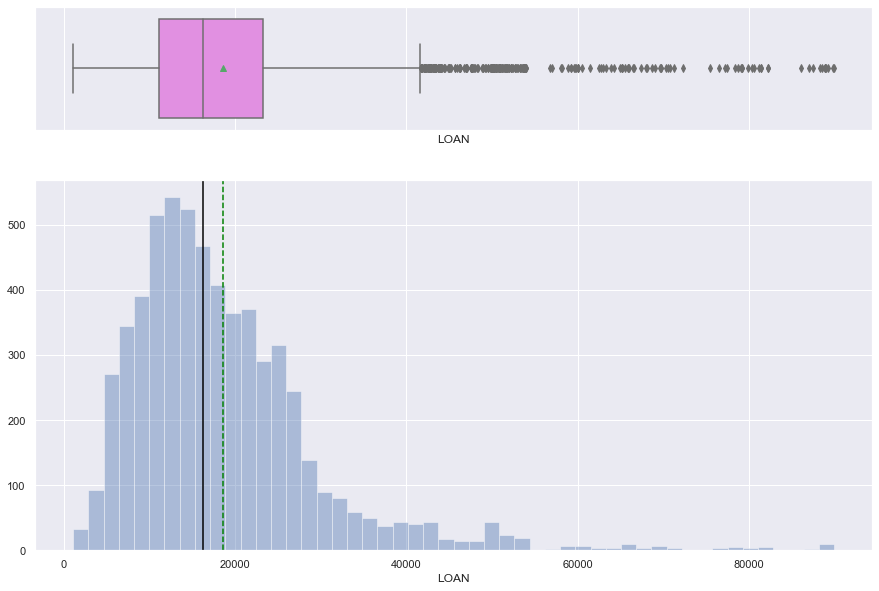

In [21]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

**Insights Loan has some outlier above 50,000, and it a right skewed distribution.Log function to remove skewness?**

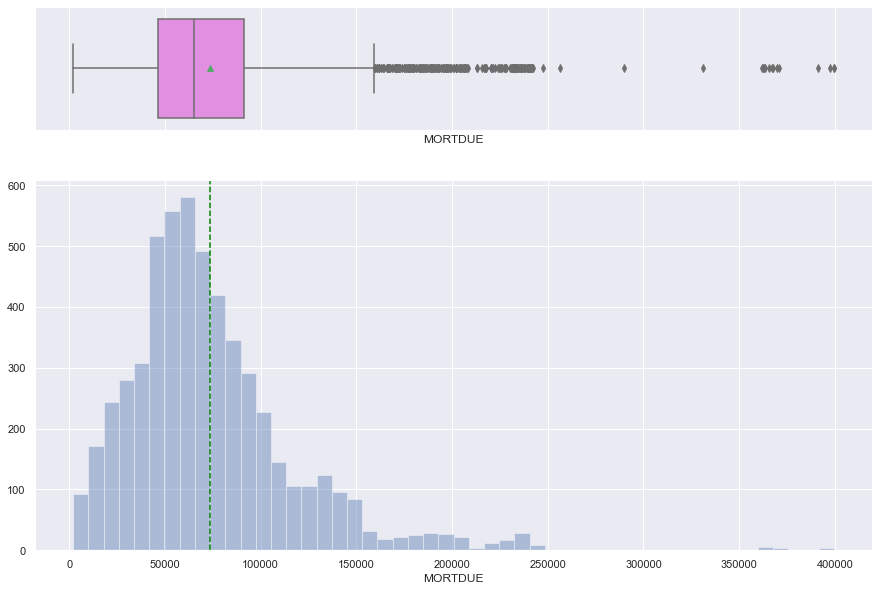

In [22]:
histogram_boxplot(data['MORTDUE'])

Also right skewed, outliers passed 250,000. Most of the volume is between 50,000 and 150,000

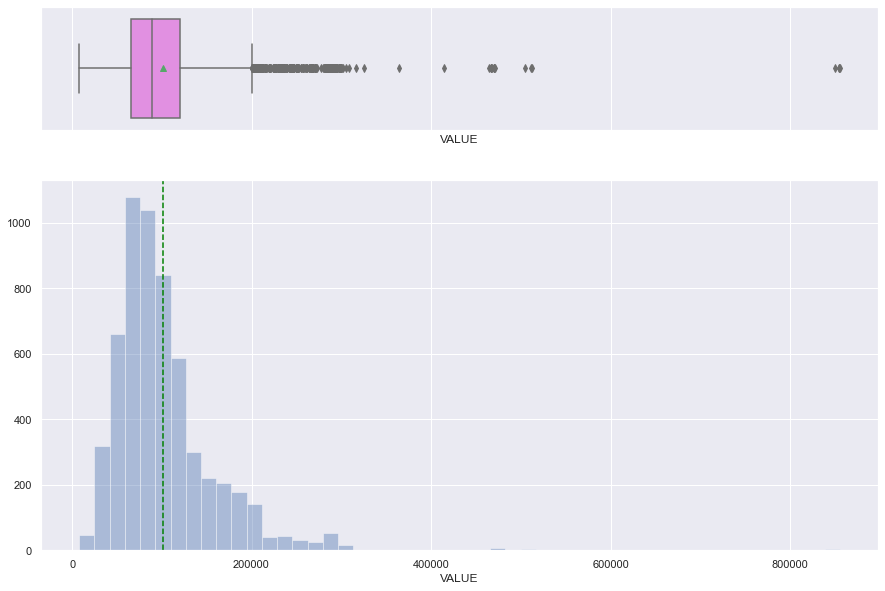

In [23]:
histogram_boxplot(data['VALUE'])

Also right skewed with most volume below 200,000. Some outliers above 400,000

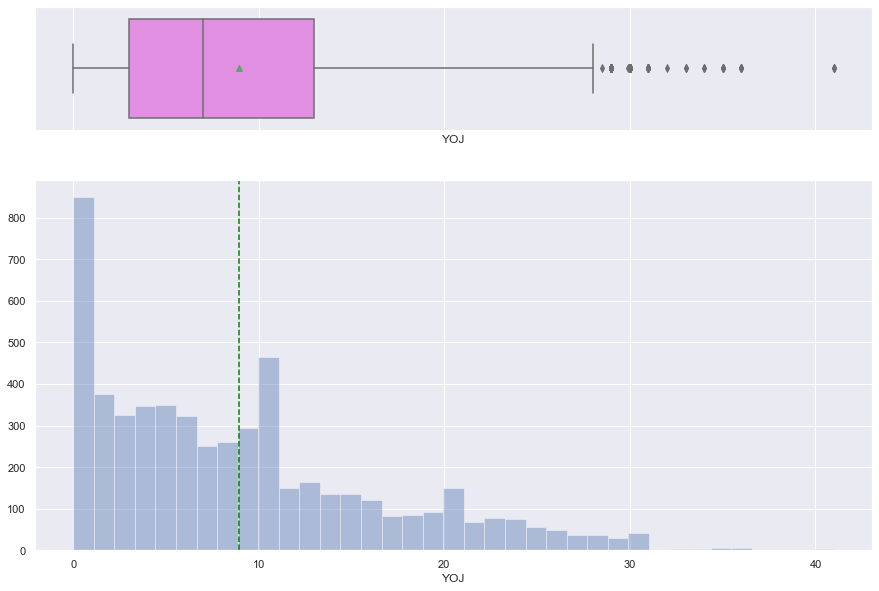

In [24]:
histogram_boxplot(data['YOJ'])

Slightly right skewed, with the largest volumn around 0 years on the job.

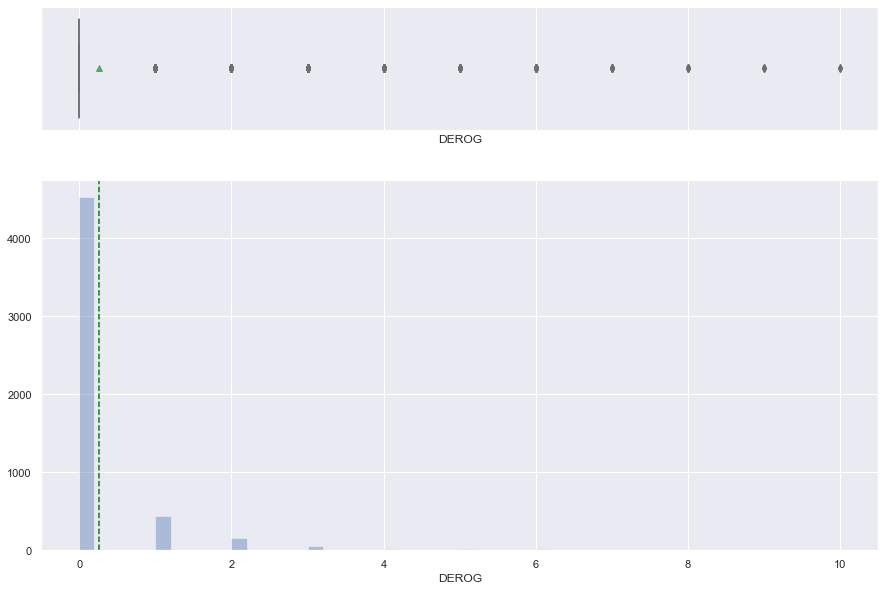

In [25]:
histogram_boxplot(data['DEROG'])

Deliquent reports max out at 10, mostly volume is around 0-2

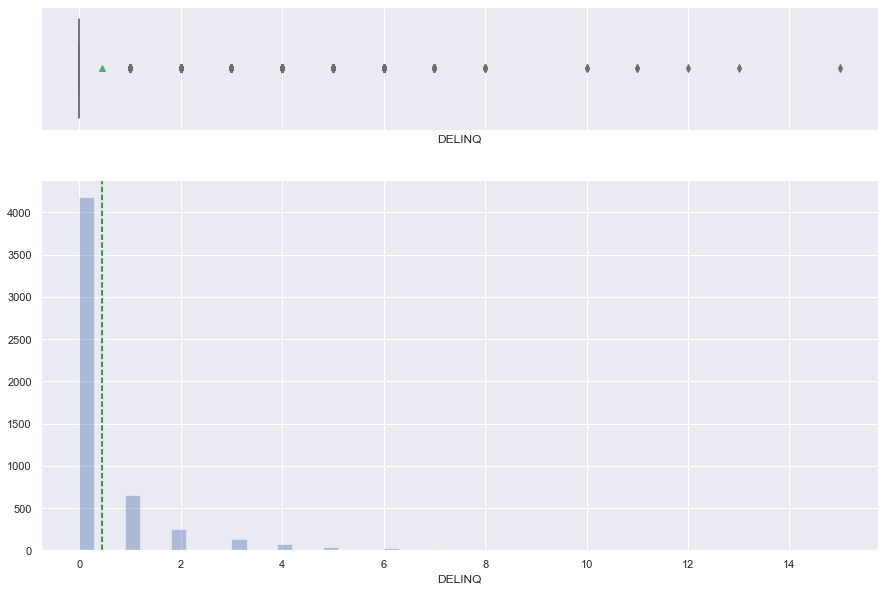

In [26]:
histogram_boxplot(data['DELINQ'])

DELINQ- number of deliquent credit lines is between 0-14, with most around 0-2

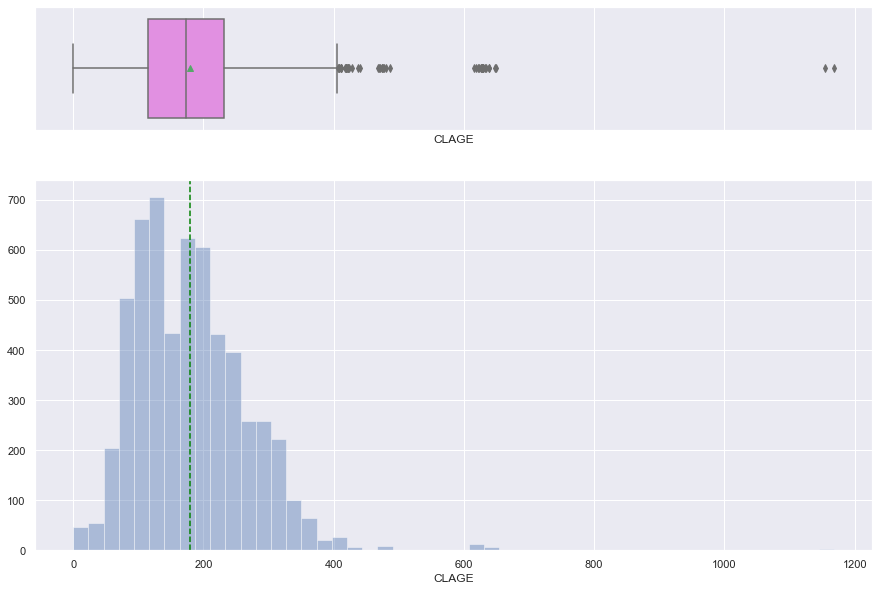

In [27]:
histogram_boxplot(data['CLAGE'])

Outliers above 400, maybe bimodial

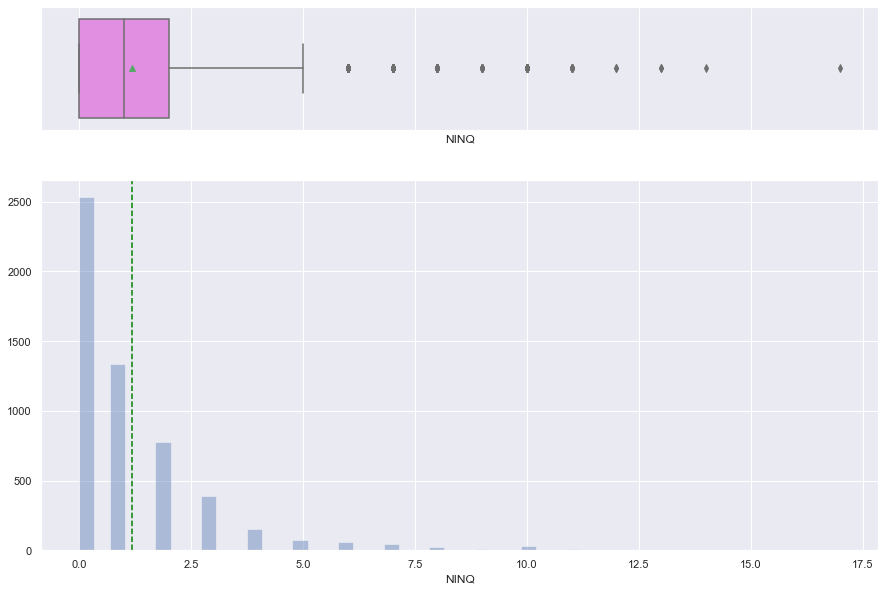

In [28]:
histogram_boxplot(data['NINQ'])

#CLNO: Number of existing credit lines.

#DEBTINC:

NINQ is between 0 and 17.5, most volume between 0 and 5

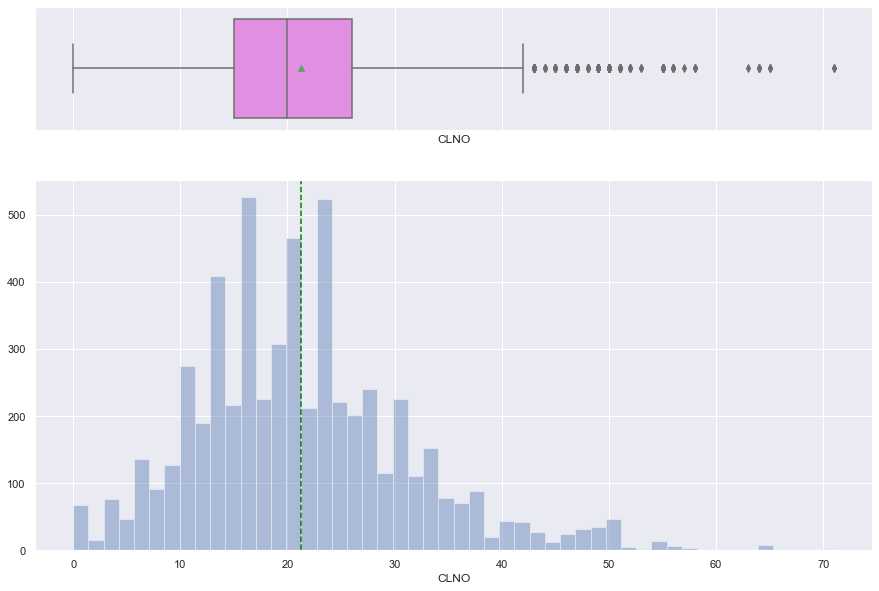

In [29]:
histogram_boxplot(data['CLNO'])

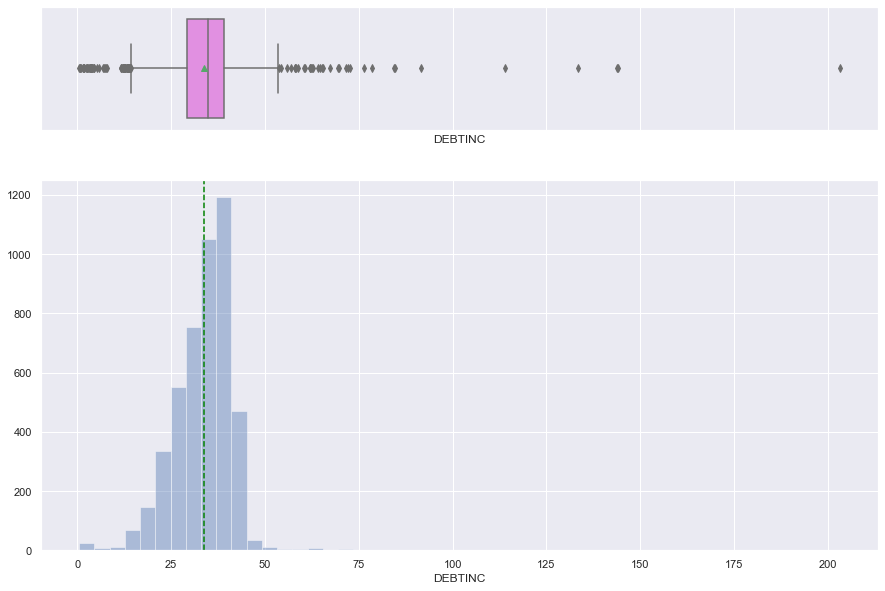

In [30]:
histogram_boxplot(data['DEBTINC'])

### **2. Univariate Analysis - Categorical Data**

In [31]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyze Barplot for DELINQ

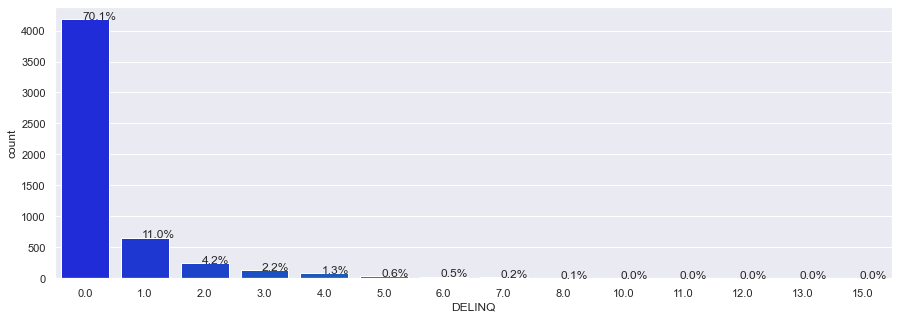

In [32]:
#Build barplot for DELINQ this is not a categorical variable?? was already observed with a histogram

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

**Insights Most people in this data set have 0 deliquent credit lines.**

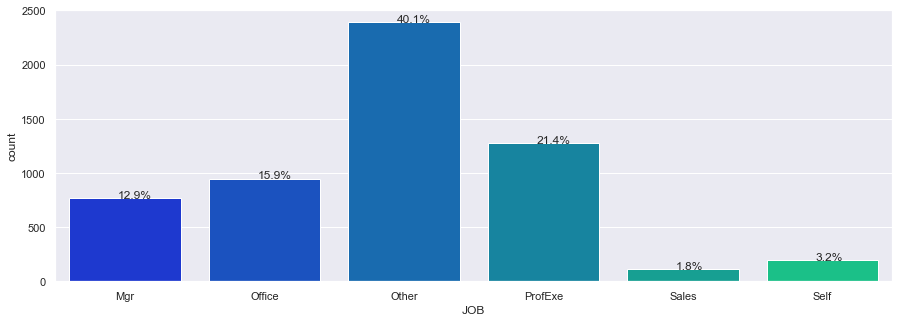

In [33]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["JOB"],palette='winter')
perc_on_bar(ax,data["JOB"])

40%+ of jobs are in the other category, which isn't very indicative - would love or this to be more specific. The second highest are ProfExe

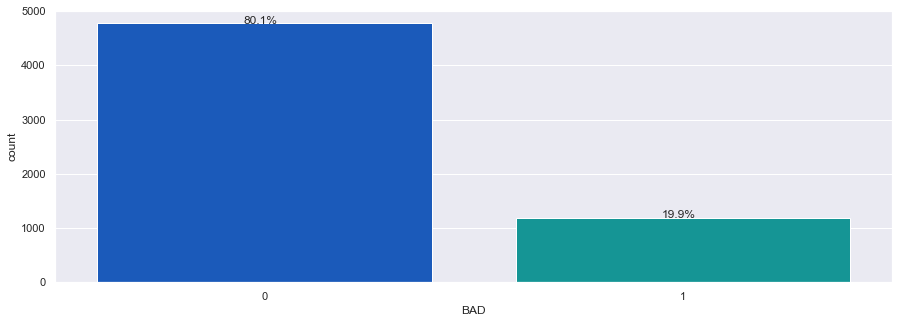

In [34]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["BAD"],palette='winter')
perc_on_bar(ax,data["BAD"])

80%+ of the time, loans are repaid

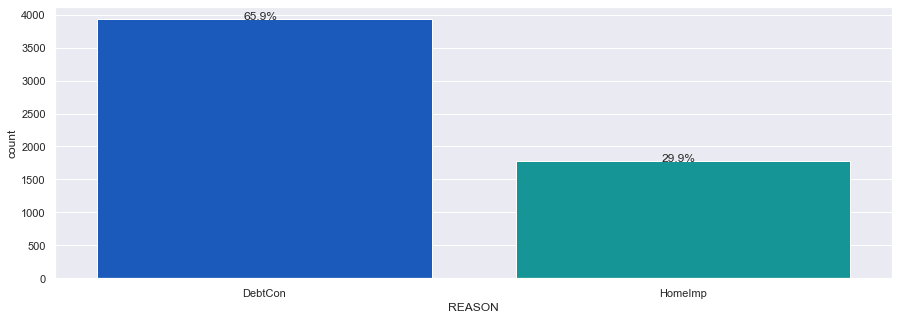

In [35]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["REASON"],palette='winter')
perc_on_bar(ax,data["REASON"])

There are only 2 options for reason of Loan, 65%+ of the loans in the data set are debt consolidation

###**Bivariate Analysis: Continuous and Categorical Variables**

<AxesSubplot:xlabel='BAD', ylabel='LOAN'>

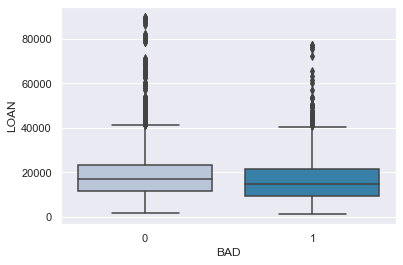

In [36]:
#bad is our target variable so I am going to focus on relationships between it and continuous variables specifically.
sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")

<AxesSubplot:xlabel='BAD', ylabel='MORTDUE'>

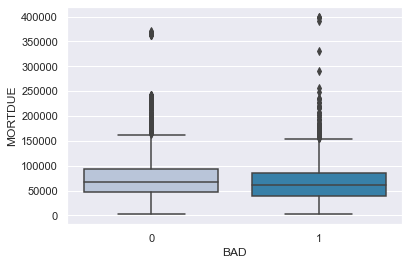

In [50]:
sns.boxplot(data["BAD"],data['MORTDUE'],palette="PuBu")

<AxesSubplot:xlabel='BAD', ylabel='VALUE'>

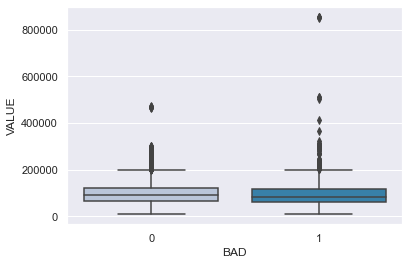

In [37]:
sns.boxplot(data["BAD"],data['VALUE'],palette="PuBu")

<AxesSubplot:xlabel='BAD', ylabel='CLAGE'>

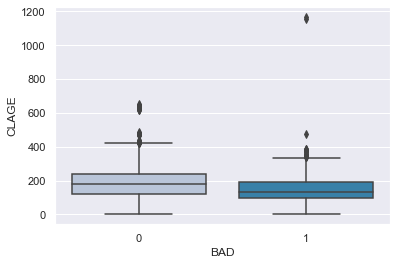

In [38]:
sns.boxplot(data["BAD"],data['CLAGE'],palette="PuBu")

**Insights There are outliers for both 0 and 1 for the Loan amount, the boxplots show dist and variance along with outliers**

<AxesSubplot:xlabel='VALUE', ylabel='MORTDUE'>

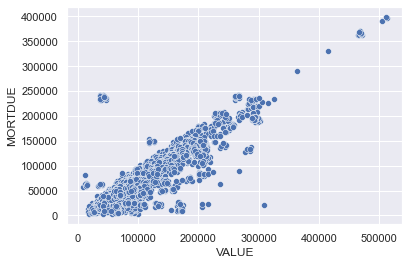

In [39]:
sns.scatterplot(data["VALUE"],data['MORTDUE'],palette="PuBu")

**Insights: The 2 seems to have a positive correlation with one another**

<AxesSubplot:xlabel='LOAN', ylabel='VALUE'>

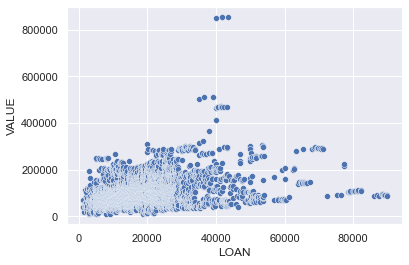

In [40]:
sns.scatterplot(data["LOAN"],data['VALUE'],palette="PuBu")

No real pattern

<AxesSubplot:xlabel='LOAN', ylabel='CLAGE'>

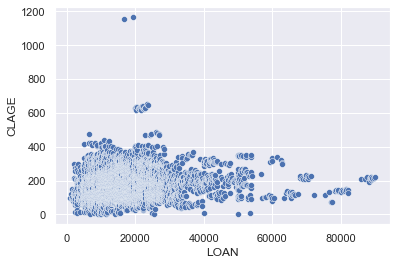

In [41]:
sns.scatterplot(data["LOAN"],data['CLAGE'],palette="PuBu")

No real pattern

<AxesSubplot:xlabel='CLAGE', ylabel='DEBTINC'>

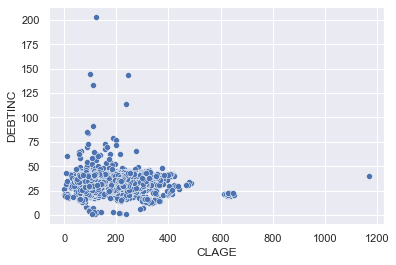

In [42]:
sns.scatterplot(data["CLAGE"],data['DEBTINC'],palette="PuBu")

No real pattern

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [43]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


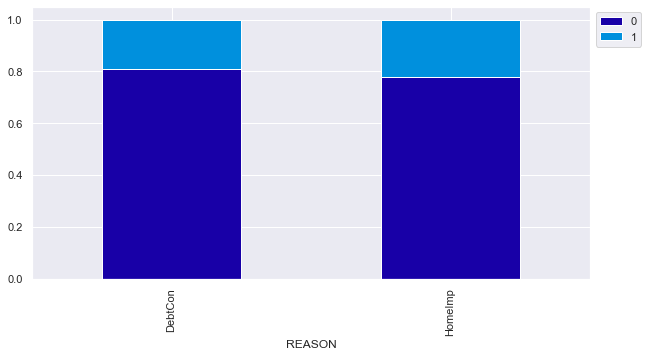

In [44]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

BAD       0     1   All
LOAN                   
1100      0     1     1
1300      0     1     1
1500      0     2     2
1700      1     1     2
1800      0     2     2
...     ...   ...   ...
89000     1     0     1
89200     1     0     1
89800     1     0     1
89900     1     0     1
All    4771  1189  5960

[541 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


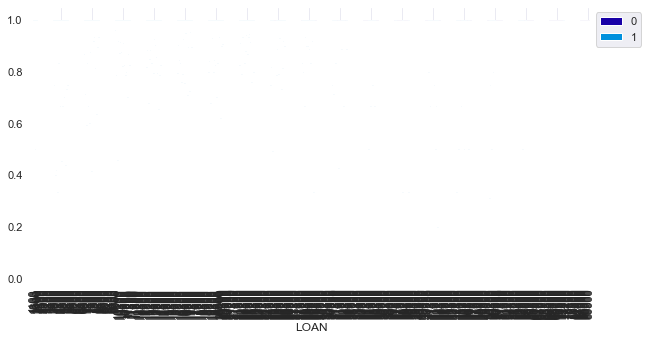

In [45]:
stacked_plot(data['LOAN'])

**Insights Most people paid off there loans, and the numbers are proportional to the number in each reason. Loan is a continuous variable so does not work well for this chart.**

#### Analyze Correlation Heatmap for Numerical Variables

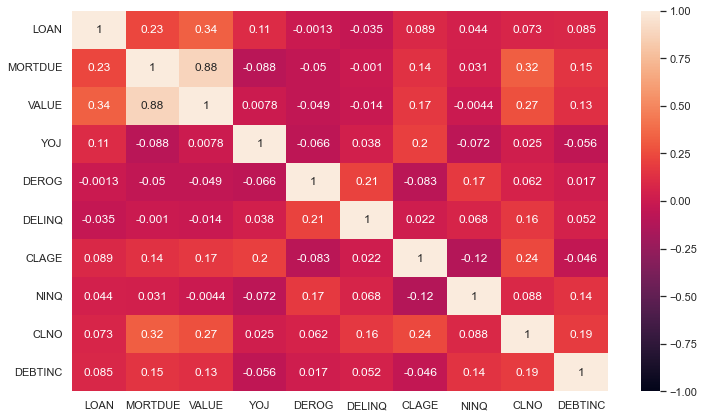

In [46]:
plt.figure(figsize = (12, 7))

sns.heatmap(data.drop(['BAD','REASON','JOB'],axis = 1).corr(), annot = True, vmin = -1, vmax = 1)

plt.show()

DEBTINC x LOAN, CLNO X LOAN, CLNO X NINQ, VALUE X YOJ all have significant correlations to eachother

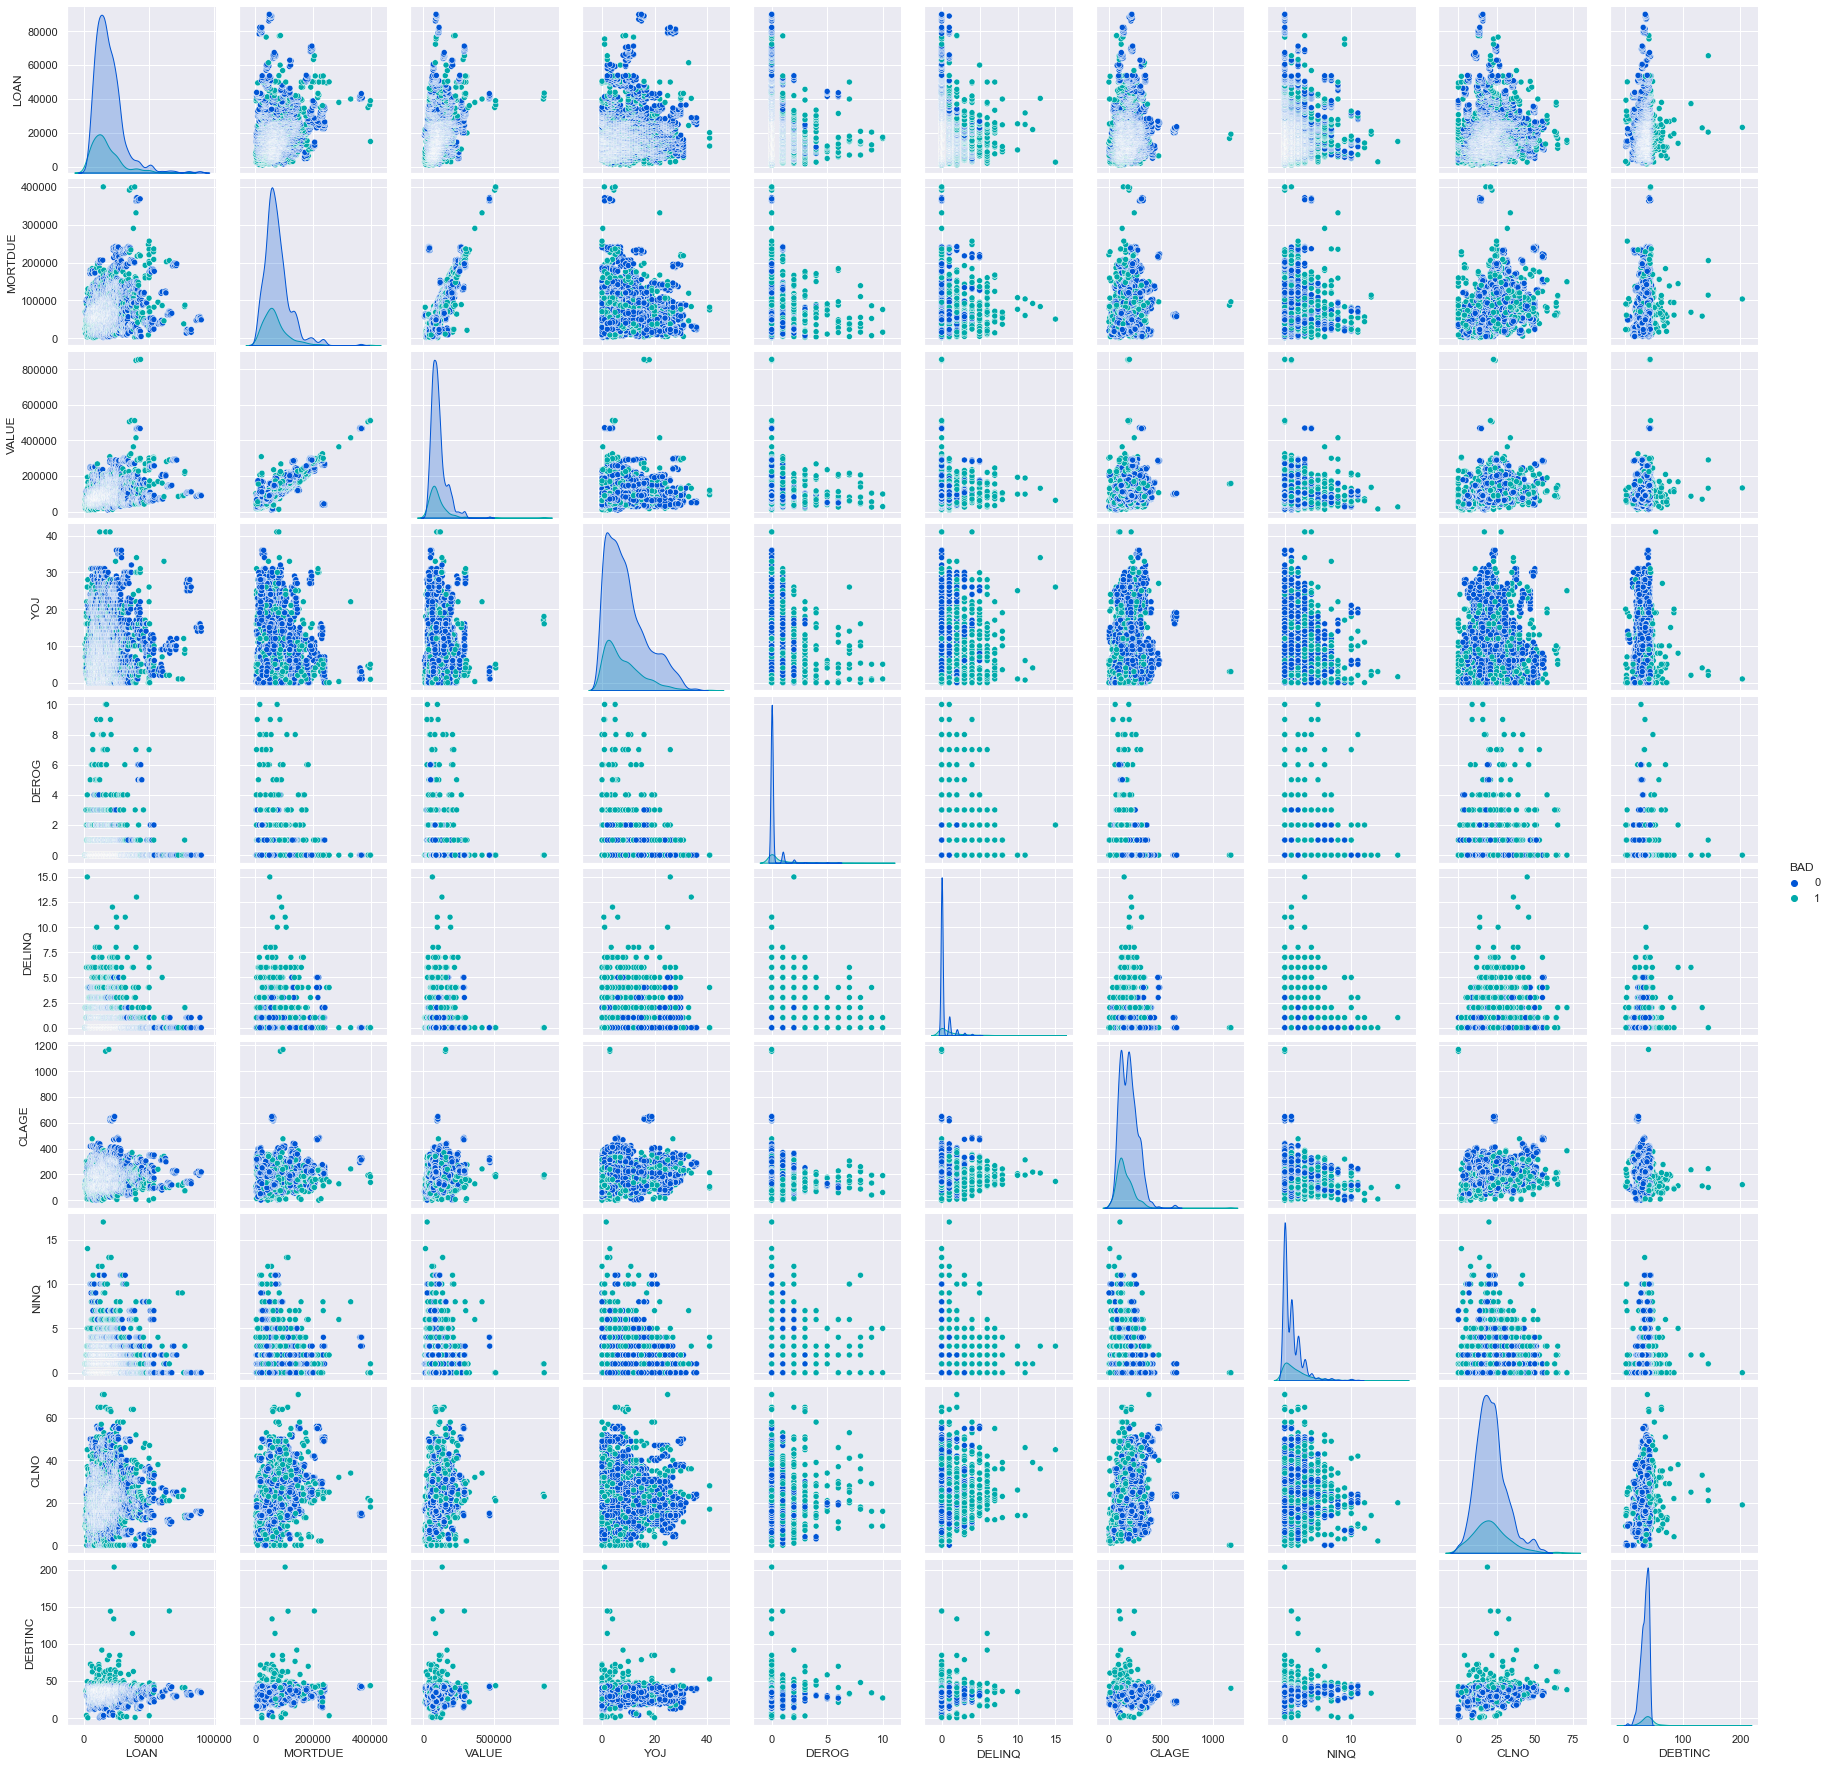

In [69]:
# Build pairplot for the data with hue = 'BAD'
# Remove ___________ and complete the code

sns.pairplot(data, hue='BAD',palette ='winter')

#### Treating Outliers

In [57]:
##should you always treat outliers for classification? are some of these not normal variance.

def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1=data.quantile(0.25) # 25th quantile
    Q3=data.quantile(0.75)  # 75th quantile
    IQR=Q3-Q1   # IQR Range
    Lower_Whisker = Q1-(1.5*IQR)  #define lower whisker
    Upper_Whisker = Q3+(1.5*IQR)  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker, axis=1) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [65]:
df1 = data.copy()
df1 = treat_outliers(df1,numerical_col)

In [66]:
df1.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [ ]:
#Could remove outliers as a treatment option
#remove outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
o = remove_outlier(op,'Price')
o

#### Filling missing values in numerical columns with median and mode in categorical variables

Lets find a better way (function) to impute values

In [70]:
n = df1['LOAN'].median()
df1['LOAN'].fillna(n,inplace = True)

In [71]:
df1.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [73]:
df1.select_dtypes(include='number').isnull().sum()

LOAN          0
MORTDUE     518
VALUE       112
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [76]:
m = df1['MORTDUE'].median()
df1['MORTDUE'].fillna(m,inplace = True)

In [74]:
v = df1['VALUE'].median()
df1['VALUE'].fillna(v,inplace = True)

In [77]:
df1.select_dtypes(include='number').isnull().sum()

LOAN          0
MORTDUE       0
VALUE         0
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [78]:
y = df1['YOJ'].median()
df1['YOJ'].fillna(y,inplace = True)

In [79]:
d = df1['DEROG'].median()
df1['DEROG'].fillna(d,inplace = True)

In [80]:
df1.select_dtypes(include='number').isnull().sum()

LOAN          0
MORTDUE       0
VALUE         0
YOJ           0
DEROG         0
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [81]:
dd = df1['DELINQ'].median()
df1['DELINQ'].fillna(dd,inplace = True)

In [82]:
c = df1['CLAGE'].median()
df1['CLAGE'].fillna(c,inplace = True)

In [83]:
df1.select_dtypes(include='number').isnull().sum()

LOAN          0
MORTDUE       0
VALUE         0
YOJ           0
DEROG         0
DELINQ        0
CLAGE         0
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [84]:
q = df1['NINQ'].median()
df1['NINQ'].fillna(q,inplace = True)

In [85]:
i = df1['DEBTINC'].median()
df1['DEBTINC'].fillna(i,inplace = True)

In [87]:
cl = df1['CLNO'].median()
df1['CLNO'].fillna(cl,inplace = True)

In [88]:
df1.select_dtypes(include='number').isnull().sum()

LOAN       0
MORTDUE    0
VALUE      0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [89]:
df1.select_dtypes(include='category').isnull().sum()

BAD         0
REASON    252
JOB       279
dtype: int64

In [105]:
rr = 'DebtCon'
df1['REASON'].fillna(rr,inplace = True)

In [101]:
j = 'Other'
df1['JOB'].fillna(j,inplace = True)

In [106]:
df1.select_dtypes(include='category').isnull().sum()

BAD       0
REASON    0
JOB       0
dtype: int64

In [107]:
df1.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,0.0,14.0,34.818262
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262


In [ ]:
data.to_csv("cars_data_updated.csv", index = False)

Potential techniques or models, KNN, Logistic Regression, LDA/QDA, Random Forest, Decision Tree (classifiers)
Measures of Success: confusion matrix -> recall, precision, f1-score
Solution Design: Test each model to see which performs the best based on metrics.The best performer will be the solution